# Breast Cancer Detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("breast_cancer_dataset.csv")
X = data[['mean radius', 'mean texture', 'mean perimeter','mean area','mean smoothness','mean compactness',
          'mean concavity','mean concave points','mean symmetry','mean fractal dimension']]
y = data['target']
X = X.values
y = y.values
print("Input features: ", X)
print("Target Features: ",y)

Input features:  [[1.799e+01 1.038e+01 1.228e+02 ... 1.471e-01 2.419e-01 7.871e-02]
 [2.057e+01 1.777e+01 1.329e+02 ... 7.017e-02 1.812e-01 5.667e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 1.279e-01 2.069e-01 5.999e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 5.302e-02 1.590e-01 5.648e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 1.520e-01 2.397e-01 7.016e-02]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 1.587e-01 5.884e-02]]
Target Features:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0

In [3]:
print ('The shape of input is:', X.shape)
print ('The shape of target variable is: ', y.shape)
print ('Number of training examples (m):', len(X))

The shape of input is: (569, 10)
The shape of target variable is:  (569,)
Number of training examples (m): 569


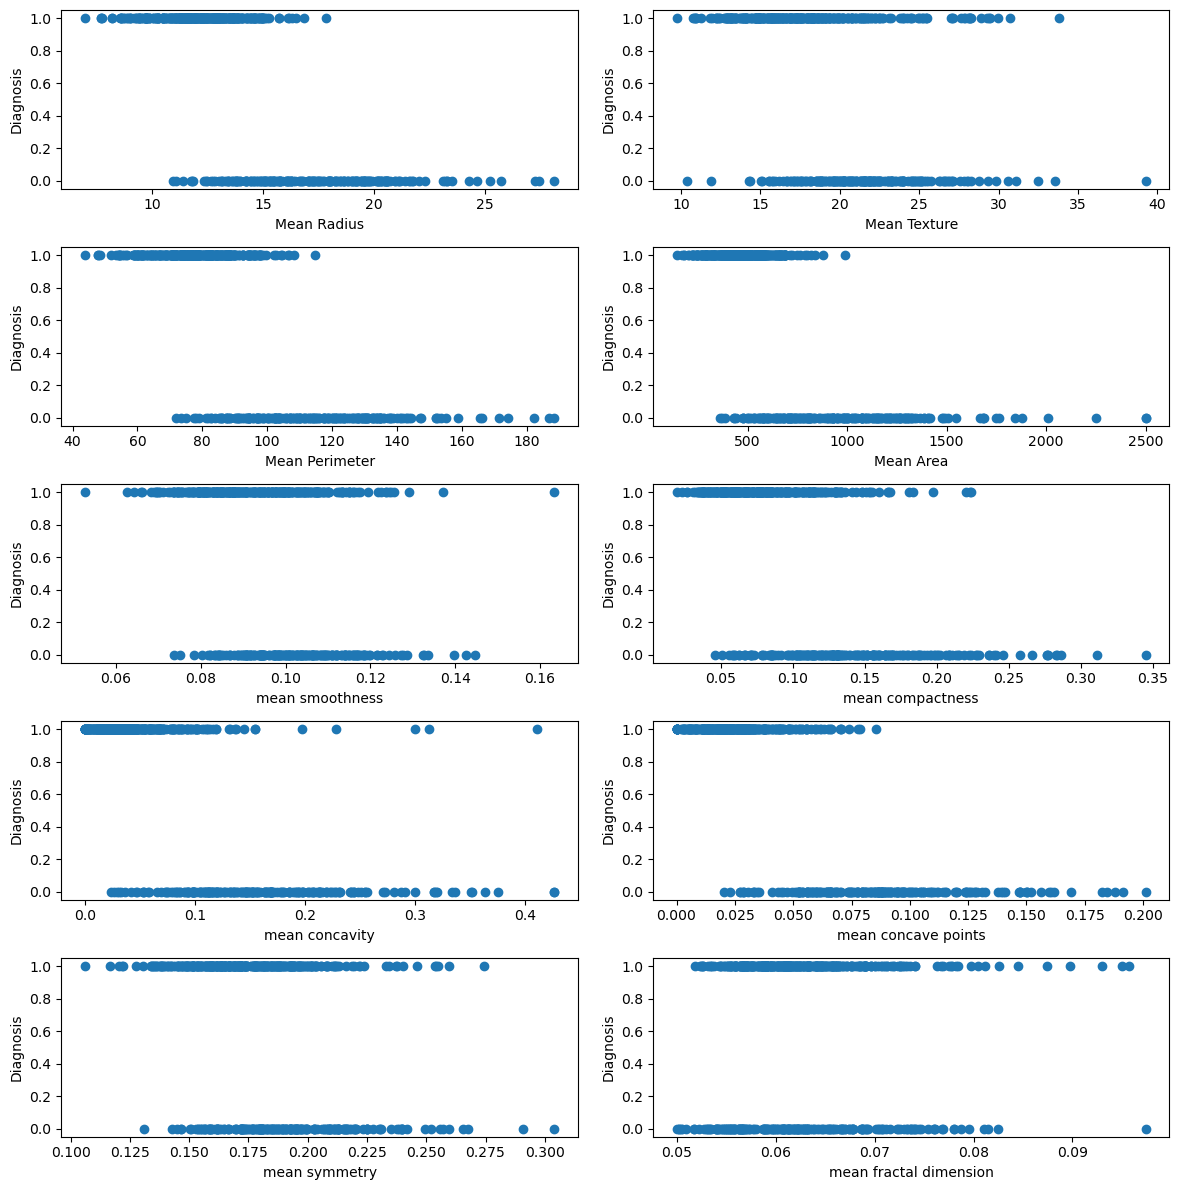

In [4]:

# Create a figure with 2 subplots
fig, axs = plt.subplots(5, 2, figsize=(12, 12))

# Plot each input feature against the target variable (Diagnosis)
axs[0][0].scatter(X[:, 0], y)  
axs[0][0].set_xlabel('Mean Radius')
axs[0][0].set_ylabel('Diagnosis')

axs[0][1].scatter(X[:, 1], y) 
axs[0][1].set_xlabel('Mean Texture')
axs[0][1].set_ylabel('Diagnosis')

axs[1][0].scatter(X[:, 2], y)  
axs[1][0].set_xlabel('Mean Perimeter')
axs[1][0].set_ylabel('Diagnosis')

axs[1][1].scatter(X[:, 3], y)
axs[1][1].set_xlabel('Mean Area')
axs[1][1].set_ylabel('Diagnosis')

axs[2][0].scatter(X[:, 4], y)  
axs[2][0].set_xlabel('mean smoothness')
axs[2][0].set_ylabel('Diagnosis')

axs[2][1].scatter(X[:, 5], y) 
axs[2][1].set_xlabel('mean compactness')
axs[2][1].set_ylabel('Diagnosis')

axs[3][0].scatter(X[:, 6], y)
axs[3][0].set_xlabel('mean concavity')
axs[3][0].set_ylabel('Diagnosis')

axs[3][1].scatter(X[:, 7], y) 
axs[3][1].set_xlabel('mean concave points')
axs[3][1].set_ylabel('Diagnosis')

axs[4][0].scatter(X[:, 8], y) 
axs[4][0].set_xlabel('mean symmetry')
axs[4][0].set_ylabel('Diagnosis')

axs[4][1].scatter(X[:, 9], y)
axs[4][1].set_xlabel('mean fractal dimension')
axs[4][1].set_ylabel('Diagnosis')

# Adjust the layout to prevent overlapping of subplots
plt.tight_layout()

# Show the plot
plt.show()


In [5]:
def sigmoid(z):
          
    g = 1/(1+np.exp(-z))
    
    return g

In [6]:
def compute_cost(X, y, w, b):

    m, n = X.shape
    epsilon = 1e-8 
    cost = 0
    for i in range(m):
        z = np.dot(X[i],w) + b
        f_wb = sigmoid(z)
        cost += -y[i]*np.log(f_wb+epsilon) - (1-y[i])*np.log(1-f_wb+epsilon)
    total_cost = cost/m

    return total_cost

In [7]:
def compute_gradient(X, y, w, b, lambda_=None): 
    
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          
        err_i  = f_wb_i  - y[i]                       
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   
    dj_db = dj_db/m                                   

    return dj_db, dj_dw

In [8]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    # number of training examples
    m = len(X)

    for i in range(num_iters):

        dj_db, dj_dw = gradient_function(X, y, w_in, b_in)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db   
        print(f"cost function after {i} iteration is {compute_cost(X,y,w_in,b_in)} ")
        
    return w_in, b_in

In [9]:
intial_w =np.random.randn(10)
initial_b = 0

iterations = 10000
alpha = 0.00001

w,b= gradient_descent(X ,y, intial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations)
print(w,b)

cost function after 0 iteration is 6.863241325391785 
cost function after 1 iteration is 6.863241325391785 
cost function after 2 iteration is 6.863241325391785 
cost function after 3 iteration is 6.863241325391785 
cost function after 4 iteration is 6.863241325391785 
cost function after 5 iteration is 6.863241325391785 
cost function after 6 iteration is 6.863241325391785 
cost function after 7 iteration is 6.863241325391785 
cost function after 8 iteration is 6.863241325391785 
cost function after 9 iteration is 6.863241325391785 
cost function after 10 iteration is 6.863241325391785 
cost function after 11 iteration is 6.863241325391785 
cost function after 12 iteration is 6.863241325391785 
cost function after 13 iteration is 6.863241325391785 
cost function after 14 iteration is 6.863241325391785 
cost function after 15 iteration is 6.863241325391785 
cost function after 16 iteration is 6.863241325391785 
cost function after 17 iteration is 6.863241325391785 
cost function after 

cost function after 153 iteration is 6.863241325391785 
cost function after 154 iteration is 6.863241325391785 
cost function after 155 iteration is 6.863241325391785 
cost function after 156 iteration is 6.863241325391785 
cost function after 157 iteration is 6.863241325391785 
cost function after 158 iteration is 6.863241325391785 
cost function after 159 iteration is 6.863241325391785 
cost function after 160 iteration is 6.863241325391785 
cost function after 161 iteration is 6.863241325391785 
cost function after 162 iteration is 6.863241325391785 
cost function after 163 iteration is 6.863241325391785 
cost function after 164 iteration is 6.863241325391785 
cost function after 165 iteration is 6.863241325391785 
cost function after 166 iteration is 6.863241325391785 
cost function after 167 iteration is 6.863241325391785 
cost function after 168 iteration is 6.863241325391785 
cost function after 169 iteration is 6.863241325391785 
cost function after 170 iteration is 6.863241325

cost function after 306 iteration is 6.863241325391785 
cost function after 307 iteration is 6.863241325391785 
cost function after 308 iteration is 6.863241325391785 
cost function after 309 iteration is 6.863241325391785 
cost function after 310 iteration is 6.863241325391785 
cost function after 311 iteration is 6.863241325391785 
cost function after 312 iteration is 6.863241325391785 
cost function after 313 iteration is 6.863241325391785 
cost function after 314 iteration is 6.863241325391785 
cost function after 315 iteration is 6.863241325391785 
cost function after 316 iteration is 6.863241325391785 
cost function after 317 iteration is 6.863241325391785 
cost function after 318 iteration is 6.863241325391785 
cost function after 319 iteration is 6.863241325391785 
cost function after 320 iteration is 6.863241325391785 
cost function after 321 iteration is 6.863241325391785 
cost function after 322 iteration is 6.863241325391785 
cost function after 323 iteration is 6.863241325

cost function after 459 iteration is 4.287290400860666 
cost function after 460 iteration is 3.9264977781020876 
cost function after 461 iteration is 3.6133575628305 
cost function after 462 iteration is 3.359065033160994 
cost function after 463 iteration is 3.148735440598669 
cost function after 464 iteration is 2.960029925200015 
cost function after 465 iteration is 2.78409356299053 
cost function after 466 iteration is 2.6247779756938345 
cost function after 467 iteration is 2.484201083145371 
cost function after 468 iteration is 2.3589129281652856 
cost function after 469 iteration is 2.2457724145909856 
cost function after 470 iteration is 2.142022613003156 
cost function after 471 iteration is 2.045715997865929 
cost function after 472 iteration is 1.956413979139262 
cost function after 473 iteration is 1.8742217396472476 
cost function after 474 iteration is 1.798826110968068 
cost function after 475 iteration is 1.729720165881558 
cost function after 476 iteration is 1.6666211

cost function after 610 iteration is 1.0885795978923065 
cost function after 611 iteration is 1.0885783973562566 
cost function after 612 iteration is 1.0885771635184693 
cost function after 613 iteration is 1.0885758983739655 
cost function after 614 iteration is 1.088574603675052 
cost function after 615 iteration is 1.0885732813288274 
cost function after 616 iteration is 1.0885719329401782 
cost function after 617 iteration is 1.0885705600764124 
cost function after 618 iteration is 1.0885691642138178 
cost function after 619 iteration is 1.0885677468499553 
cost function after 620 iteration is 1.0885663091202533 
cost function after 621 iteration is 1.0885648523530294 
cost function after 622 iteration is 1.0885633776336792 
cost function after 623 iteration is 1.0885618861749229 
cost function after 624 iteration is 1.088560378837702 
cost function after 625 iteration is 1.0885588566750144 
cost function after 626 iteration is 1.0885573205962344 
cost function after 627 iteration

cost function after 760 iteration is 1.0883261654769327 
cost function after 761 iteration is 1.088324416730254 
cost function after 762 iteration is 1.0883226679760103 
cost function after 763 iteration is 1.0883209191711778 
cost function after 764 iteration is 1.0883191704324522 
cost function after 765 iteration is 1.0883174217015612 
cost function after 766 iteration is 1.0883156729929817 
cost function after 767 iteration is 1.0883139242785311 
cost function after 768 iteration is 1.0883121755494707 
cost function after 769 iteration is 1.0883104268169896 
cost function after 770 iteration is 1.0883086781291744 
cost function after 771 iteration is 1.0883069294631542 
cost function after 772 iteration is 1.088305180757181 
cost function after 773 iteration is 1.0883034320734866 
cost function after 774 iteration is 1.0883016834217454 
cost function after 775 iteration is 1.0882999347560054 
cost function after 776 iteration is 1.0882981861240977 
cost function after 777 iteration

cost function after 907 iteration is 1.0880691963796711 
cost function after 908 iteration is 1.0880674490223916 
cost function after 909 iteration is 1.0880657016637836 
cost function after 910 iteration is 1.0880639543289758 
cost function after 911 iteration is 1.0880622069911403 
cost function after 912 iteration is 1.0880604596425707 
cost function after 913 iteration is 1.0880587123628496 
cost function after 914 iteration is 1.0880569649982328 
cost function after 915 iteration is 1.0880552177390246 
cost function after 916 iteration is 1.0880534703990734 
cost function after 917 iteration is 1.0880517231617794 
cost function after 918 iteration is 1.0880499758771176 
cost function after 919 iteration is 1.088048228603743 
cost function after 920 iteration is 1.0880464813992394 
cost function after 921 iteration is 1.0880447341475632 
cost function after 922 iteration is 1.0880429869415622 
cost function after 923 iteration is 1.0880412397108612 
cost function after 924 iteratio

cost function after 1054 iteration is 1.0878124386351626 
cost function after 1055 iteration is 1.0878106927069098 
cost function after 1056 iteration is 1.0878089468359955 
cost function after 1057 iteration is 1.0878072008693427 
cost function after 1058 iteration is 1.0878054549862697 
cost function after 1059 iteration is 1.0878037091130603 
cost function after 1060 iteration is 1.0878019631781513 
cost function after 1061 iteration is 1.0878002173265393 
cost function after 1062 iteration is 1.0877984714855486 
cost function after 1063 iteration is 1.0877967256539889 
cost function after 1064 iteration is 1.0877949797989723 
cost function after 1065 iteration is 1.087793234025791 
cost function after 1066 iteration is 1.0877914881699968 
cost function after 1067 iteration is 1.0877897423094167 
cost function after 1068 iteration is 1.087787996567605 
cost function after 1069 iteration is 1.087786250766959 
cost function after 1070 iteration is 1.0877845049748909 
cost function aft

cost function after 1202 iteration is 1.0875541473076302 
cost function after 1203 iteration is 1.087552402798621 
cost function after 1204 iteration is 1.0875506583151446 
cost function after 1205 iteration is 1.0875489138630254 
cost function after 1206 iteration is 1.087547169422856 
cost function after 1207 iteration is 1.0875454249687182 
cost function after 1208 iteration is 1.0875436804780094 
cost function after 1209 iteration is 1.087541936083416 
cost function after 1210 iteration is 1.087540191648772 
cost function after 1211 iteration is 1.0875384472748346 
cost function after 1212 iteration is 1.0875367028046412 
cost function after 1213 iteration is 1.0875349584744902 
cost function after 1214 iteration is 1.0875332140953746 
cost function after 1215 iteration is 1.087531469679519 
cost function after 1216 iteration is 1.0875297253583907 
cost function after 1217 iteration is 1.0875279809766372 
cost function after 1218 iteration is 1.0875262366995941 
cost function after

cost function after 1347 iteration is 1.087301297799917 
cost function after 1348 iteration is 1.0872995546960367 
cost function after 1349 iteration is 1.0872978116148353 
cost function after 1350 iteration is 1.0872960685455648 
cost function after 1351 iteration is 1.0872943254510081 
cost function after 1352 iteration is 1.0872925824736985 
cost function after 1353 iteration is 1.0872908394002003 
cost function after 1354 iteration is 1.087289096372181 
cost function after 1355 iteration is 1.0872873533558058 
cost function after 1356 iteration is 1.0872856103140982 
cost function after 1357 iteration is 1.0872838673553595 
cost function after 1358 iteration is 1.087282124369668 
cost function after 1359 iteration is 1.087280381394854 
cost function after 1360 iteration is 1.0872786384314883 
cost function after 1361 iteration is 1.0872768954433631 
cost function after 1362 iteration is 1.0872751525002493 
cost function after 1363 iteration is 1.0872734095693717 
cost function afte

cost function after 1489 iteration is 1.0870538763078967 
cost function after 1490 iteration is 1.0870521346174817 
cost function after 1491 iteration is 1.0870503929026962 
cost function after 1492 iteration is 1.0870486511757418 
cost function after 1493 iteration is 1.0870469095179265 
cost function after 1494 iteration is 1.0870451678348154 
cost function after 1495 iteration is 1.0870434261619362 
cost function after 1496 iteration is 1.0870416845125348 
cost function after 1497 iteration is 1.0870399428263382 
cost function after 1498 iteration is 1.0870382012562438 
cost function after 1499 iteration is 1.0870364596389952 
cost function after 1500 iteration is 1.0870347179465734 
cost function after 1501 iteration is 1.0870329763502409 
cost function after 1502 iteration is 1.0870312347166369 
cost function after 1503 iteration is 1.0870294931768032 
cost function after 1504 iteration is 1.0870277515643556 
cost function after 1505 iteration is 1.0870260100103528 
cost function 

cost function after 1636 iteration is 1.0867979468510727 
cost function after 1637 iteration is 1.086796206551256 
cost function after 1638 iteration is 1.0867944661881601 
cost function after 1639 iteration is 1.0867927259091392 
cost function after 1640 iteration is 1.086790985662383 
cost function after 1641 iteration is 1.0867892453669132 
cost function after 1642 iteration is 1.0867875051190063 
cost function after 1643 iteration is 1.0867857648460848 
cost function after 1644 iteration is 1.0867840245820046 
cost function after 1645 iteration is 1.0867822844232857 
cost function after 1646 iteration is 1.08678054421793 
cost function after 1647 iteration is 1.0867788039859185 
cost function after 1648 iteration is 1.0867770637652 
cost function after 1649 iteration is 1.0867753235908628 
cost function after 1650 iteration is 1.0867735833901364 
cost function after 1651 iteration is 1.0867718432365838 
cost function after 1652 iteration is 1.0867701030586099 
cost function after 1

cost function after 1781 iteration is 1.0865457015600812 
cost function after 1782 iteration is 1.0865439626425033 
cost function after 1783 iteration is 1.0865422237482087 
cost function after 1784 iteration is 1.0865404847807738 
cost function after 1785 iteration is 1.08653874596597 
cost function after 1786 iteration is 1.0865370070188567 
cost function after 1787 iteration is 1.0865352681657527 
cost function after 1788 iteration is 1.0865335292772138 
cost function after 1789 iteration is 1.0865317903954164 
cost function after 1790 iteration is 1.086530051575989 
cost function after 1791 iteration is 1.0865283127163305 
cost function after 1792 iteration is 1.0865265738450578 
cost function after 1793 iteration is 1.0865248350792225 
cost function after 1794 iteration is 1.0865230962503971 
cost function after 1795 iteration is 1.086521357483612 
cost function after 1796 iteration is 1.0865196186410668 
cost function after 1797 iteration is 1.086517879855866 
cost function after

cost function after 1924 iteration is 1.0862971311635663 
cost function after 1925 iteration is 1.0862953935784756 
cost function after 1926 iteration is 1.086293656026546 
cost function after 1927 iteration is 1.0862919184627164 
cost function after 1928 iteration is 1.0862901809086498 
cost function after 1929 iteration is 1.0862884433886115 
cost function after 1930 iteration is 1.0862867058556072 
cost function after 1931 iteration is 1.0862849683348357 
cost function after 1932 iteration is 1.0862832308232535 
cost function after 1933 iteration is 1.0862814933438296 
cost function after 1934 iteration is 1.086279755852776 
cost function after 1935 iteration is 1.0862780183722993 
cost function after 1936 iteration is 1.0862762809024389 
cost function after 1937 iteration is 1.0862745434428935 
cost function after 1938 iteration is 1.086272805995152 
cost function after 1939 iteration is 1.086271068556529 
cost function after 1940 iteration is 1.086269331127734 
cost function after

cost function after 2066 iteration is 1.0860504901968666 
cost function after 2067 iteration is 1.0860487539155137 
cost function after 2068 iteration is 1.086047017750663 
cost function after 2069 iteration is 1.0860452815253405 
cost function after 2070 iteration is 1.086043545310604 
cost function after 2071 iteration is 1.0860418091195885 
cost function after 2072 iteration is 1.086040072888197 
cost function after 2073 iteration is 1.0860383367406632 
cost function after 2074 iteration is 1.0860366005317343 
cost function after 2075 iteration is 1.0860348644394309 
cost function after 2076 iteration is 1.08603312822853 
cost function after 2077 iteration is 1.0860313921220655 
cost function after 2078 iteration is 1.0860296559909748 
cost function after 2079 iteration is 1.0860279198815166 
cost function after 2080 iteration is 1.0860261837346887 
cost function after 2081 iteration is 1.0860244476112209 
cost function after 2082 iteration is 1.0860227115562404 
cost function after

cost function after 2217 iteration is 1.0857884249145011 
cost function after 2218 iteration is 1.0857866901061664 
cost function after 2219 iteration is 1.0857849553086871 
cost function after 2220 iteration is 1.085783220484872 
cost function after 2221 iteration is 1.085781485695547 
cost function after 2222 iteration is 1.0857797508920375 
cost function after 2223 iteration is 1.0857780161712143 
cost function after 2224 iteration is 1.0857762813905496 
cost function after 2225 iteration is 1.085774546618173 
cost function after 2226 iteration is 1.0857728118928265 
cost function after 2227 iteration is 1.0857710771063374 
cost function after 2228 iteration is 1.085769342401575 
cost function after 2229 iteration is 1.0857676077071485 
cost function after 2230 iteration is 1.08576587295171 
cost function after 2231 iteration is 1.0857641383132781 
cost function after 2232 iteration is 1.0857624036129851 
cost function after 2233 iteration is 1.0857606689252337 
cost function after 

cost function after 2366 iteration is 1.085530039577831 
cost function after 2367 iteration is 1.0855283061681247 
cost function after 2368 iteration is 1.0855265727446588 
cost function after 2369 iteration is 1.0855248392814505 
cost function after 2370 iteration is 1.0855231059154886 
cost function after 2371 iteration is 1.085521372509017 
cost function after 2372 iteration is 1.0855196391620647 
cost function after 2373 iteration is 1.0855179057777724 
cost function after 2374 iteration is 1.0855161723798328 
cost function after 2375 iteration is 1.0855144390500344 
cost function after 2376 iteration is 1.0855127056743552 
cost function after 2377 iteration is 1.0855109723646734 
cost function after 2378 iteration is 1.0855092390083367 
cost function after 2379 iteration is 1.085507505697194 
cost function after 2380 iteration is 1.0855057723628379 
cost function after 2381 iteration is 1.0855040390947917 
cost function after 2382 iteration is 1.0855023057794704 
cost function aft

cost function after 2509 iteration is 1.0852822531048947 
cost function after 2510 iteration is 1.0852805209637855 
cost function after 2511 iteration is 1.0852787888677335 
cost function after 2512 iteration is 1.0852770567835561 
cost function after 2513 iteration is 1.0852753247078415 
cost function after 2514 iteration is 1.0852735926085557 
cost function after 2515 iteration is 1.085271860589073 
cost function after 2516 iteration is 1.085270128509427 
cost function after 2517 iteration is 1.085268396440607 
cost function after 2518 iteration is 1.0852666644171145 
cost function after 2519 iteration is 1.0852649324033974 
cost function after 2520 iteration is 1.0852632003643292 
cost function after 2521 iteration is 1.0852614684080533 
cost function after 2522 iteration is 1.0852597364030057 
cost function after 2523 iteration is 1.0852580044305937 
cost function after 2524 iteration is 1.0852562724323023 
cost function after 2525 iteration is 1.0852545405155707 
cost function aft

cost function after 2653 iteration is 1.0850329247765085 
cost function after 2654 iteration is 1.0850311940030872 
cost function after 2655 iteration is 1.0850294632176858 
cost function after 2656 iteration is 1.0850277324640856 
cost function after 2657 iteration is 1.085026001662466 
cost function after 2658 iteration is 1.085024270964394 
cost function after 2659 iteration is 1.0850225402199267 
cost function after 2660 iteration is 1.0850208095209048 
cost function after 2661 iteration is 1.0850190788187133 
cost function after 2662 iteration is 1.0850173480681753 
cost function after 2663 iteration is 1.0850156173987815 
cost function after 2664 iteration is 1.0850138866927248 
cost function after 2665 iteration is 1.085012156043749 
cost function after 2666 iteration is 1.0850104253708877 
cost function after 2667 iteration is 1.0850086946922315 
cost function after 2668 iteration is 1.0850069640391509 
cost function after 2669 iteration is 1.0850052334310654 
cost function aft

cost function after 2804 iteration is 1.0847716811052321 
cost function after 2805 iteration is 1.0847699517047342 
cost function after 2806 iteration is 1.0847682223285837 
cost function after 2807 iteration is 1.084766492985881 
cost function after 2808 iteration is 1.0847647635445625 
cost function after 2809 iteration is 1.084763034199637 
cost function after 2810 iteration is 1.0847613048485325 
cost function after 2811 iteration is 1.084759575510909 
cost function after 2812 iteration is 1.08475784615897 
cost function after 2813 iteration is 1.0847561168409703 
cost function after 2814 iteration is 1.0847543875666896 
cost function after 2815 iteration is 1.0847526582464413 
cost function after 2816 iteration is 1.0847509289567159 
cost function after 2817 iteration is 1.0847491996575516 
cost function after 2818 iteration is 1.084747470423848 
cost function after 2819 iteration is 1.0847457411442605 
cost function after 2820 iteration is 1.0847440118609355 
cost function after 

cost function after 2956 iteration is 1.08450891776294 
cost function after 2957 iteration is 1.0845071898119116 
cost function after 2958 iteration is 1.0845054617978303 
cost function after 2959 iteration is 1.084503733759066 
cost function after 2960 iteration is 1.0845020058368218 
cost function after 2961 iteration is 1.084500277890536 
cost function after 2962 iteration is 1.084498549917207 
cost function after 2963 iteration is 1.0844968219542253 
cost function after 2964 iteration is 1.0844950939794225 
cost function after 2965 iteration is 1.0844933660361518 
cost function after 2966 iteration is 1.0844916381404672 
cost function after 2967 iteration is 1.0844899102524497 
cost function after 2968 iteration is 1.0844881823049262 
cost function after 2969 iteration is 1.0844864543800572 
cost function after 2970 iteration is 1.0844847265247182 
cost function after 2971 iteration is 1.0844829986418416 
cost function after 2972 iteration is 1.0844812707474492 
cost function after

cost function after 3101 iteration is 1.0842584511870232 
cost function after 3102 iteration is 1.0842567244843515 
cost function after 3103 iteration is 1.0842549978407572 
cost function after 3104 iteration is 1.0842532711719766 
cost function after 3105 iteration is 1.0842515444652963 
cost function after 3106 iteration is 1.0842498178169173 
cost function after 3107 iteration is 1.0842480911781258 
cost function after 3108 iteration is 1.0842463645360048 
cost function after 3109 iteration is 1.084244637881009 
cost function after 3110 iteration is 1.084242911236716 
cost function after 3111 iteration is 1.0842411846385112 
cost function after 3112 iteration is 1.0842394580501276 
cost function after 3113 iteration is 1.0842377314011227 
cost function after 3114 iteration is 1.0842360048338933 
cost function after 3115 iteration is 1.0842342782974264 
cost function after 3116 iteration is 1.0842325517139026 
cost function after 3117 iteration is 1.0842308251750876 
cost function af

cost function after 3250 iteration is 1.0840012730946889 
cost function after 3251 iteration is 1.0839995477608013 
cost function after 3252 iteration is 1.0839978224367628 
cost function after 3253 iteration is 1.0839960970293059 
cost function after 3254 iteration is 1.0839943717607141 
cost function after 3255 iteration is 1.083992646444462 
cost function after 3256 iteration is 1.0839909211606709 
cost function after 3257 iteration is 1.0839891957921348 
cost function after 3258 iteration is 1.083987470563994 
cost function after 3259 iteration is 1.0839857452884665 
cost function after 3260 iteration is 1.0839840199720567 
cost function after 3261 iteration is 1.0839822947507427 
cost function after 3262 iteration is 1.0839805694921418 
cost function after 3263 iteration is 1.0839788442189136 
cost function after 3264 iteration is 1.0839771190283027 
cost function after 3265 iteration is 1.0839753937995313 
cost function after 3266 iteration is 1.0839736685562296 
cost function af

cost function after 3400 iteration is 1.083742570566882 
cost function after 3401 iteration is 1.0837408465315852 
cost function after 3402 iteration is 1.0837391225417659 
cost function after 3403 iteration is 1.0837373985986043 
cost function after 3404 iteration is 1.0837356745715385 
cost function after 3405 iteration is 1.0837339506143797 
cost function after 3406 iteration is 1.0837322266281295 
cost function after 3407 iteration is 1.0837305026879005 
cost function after 3408 iteration is 1.083728778773144 
cost function after 3409 iteration is 1.0837270548181168 
cost function after 3410 iteration is 1.0837253308372237 
cost function after 3411 iteration is 1.0837236069524931 
cost function after 3412 iteration is 1.083721883061772 
cost function after 3413 iteration is 1.0837201591960715 
cost function after 3414 iteration is 1.0837184352551024 
cost function after 3415 iteration is 1.0837167113376376 
cost function after 3416 iteration is 1.083714987523218 
cost function afte

cost function after 3551 iteration is 1.0834823464273275 
cost function after 3552 iteration is 1.0834806237312369 
cost function after 3553 iteration is 1.0834789011160184 
cost function after 3554 iteration is 1.0834771784394817 
cost function after 3555 iteration is 1.0834754557732482 
cost function after 3556 iteration is 1.0834737332234894 
cost function after 3557 iteration is 1.083472010611944 
cost function after 3558 iteration is 1.083470287953098 
cost function after 3559 iteration is 1.083468565361897 
cost function after 3560 iteration is 1.0834668427800518 
cost function after 3561 iteration is 1.08346512017288 
cost function after 3562 iteration is 1.0834633976111867 
cost function after 3563 iteration is 1.083461675001452 
cost function after 3564 iteration is 1.0834599524943138 
cost function after 3565 iteration is 1.0834582299619646 
cost function after 3566 iteration is 1.083456507441131 
cost function after 3567 iteration is 1.083454784871267 
cost function after 35

cost function after 3694 iteration is 1.0832360957735212 
cost function after 3695 iteration is 1.0832343743873494 
cost function after 3696 iteration is 1.0832326529893281 
cost function after 3697 iteration is 1.0832309316363777 
cost function after 3698 iteration is 1.083229210280025 
cost function after 3699 iteration is 1.083227488946094 
cost function after 3700 iteration is 1.083225767516049 
cost function after 3701 iteration is 1.083224046201969 
cost function after 3702 iteration is 1.0832223248845356 
cost function after 3703 iteration is 1.0832206035548033 
cost function after 3704 iteration is 1.083218882200285 
cost function after 3705 iteration is 1.083217160925978 
cost function after 3706 iteration is 1.0832154395892548 
cost function after 3707 iteration is 1.0832137183346537 
cost function after 3708 iteration is 1.0832119970546927 
cost function after 3709 iteration is 1.0832102757851385 
cost function after 3710 iteration is 1.083208554524227 
cost function after 3

cost function after 3846 iteration is 1.0829745449769739 
cost function after 3847 iteration is 1.0829728248878927 
cost function after 3848 iteration is 1.0829711048950845 
cost function after 3849 iteration is 1.0829693848262294 
cost function after 3850 iteration is 1.082967664817579 
cost function after 3851 iteration is 1.0829659447458064 
cost function after 3852 iteration is 1.0829642247789526 
cost function after 3853 iteration is 1.0829625047624432 
cost function after 3854 iteration is 1.082960784722699 
cost function after 3855 iteration is 1.0829590647853418 
cost function after 3856 iteration is 1.082957344797764 
cost function after 3857 iteration is 1.0829556248584602 
cost function after 3858 iteration is 1.0829539048552663 
cost function after 3859 iteration is 1.0829521849567219 
cost function after 3860 iteration is 1.0829504650083097 
cost function after 3861 iteration is 1.0829487451077575 
cost function after 3862 iteration is 1.0829470251095705 
cost function aft

cost function after 3996 iteration is 1.0827166346210044 
cost function after 3997 iteration is 1.0827149159104474 
cost function after 3998 iteration is 1.0827131971537145 
cost function after 3999 iteration is 1.0827114784300438 
cost function after 4000 iteration is 1.0827097597145625 
cost function after 4001 iteration is 1.0827080410210634 
cost function after 4002 iteration is 1.0827063223268953 
cost function after 4003 iteration is 1.0827046036190093 
cost function after 4004 iteration is 1.0827028849414713 
cost function after 4005 iteration is 1.0827011662527344 
cost function after 4006 iteration is 1.0826994475732383 
cost function after 4007 iteration is 1.0826977289626718 
cost function after 4008 iteration is 1.0826960103031011 
cost function after 4009 iteration is 1.0826942916397275 
cost function after 4010 iteration is 1.0826925730344537 
cost function after 4011 iteration is 1.0826908544407143 
cost function after 4012 iteration is 1.0826891357853003 
cost function 

cost function after 4140 iteration is 1.0824692256388355 
cost function after 4141 iteration is 1.0824675081720185 
cost function after 4142 iteration is 1.0824657906786879 
cost function after 4143 iteration is 1.0824640731972526 
cost function after 4144 iteration is 1.082462355758977 
cost function after 4145 iteration is 1.082460638330169 
cost function after 4146 iteration is 1.0824589208554123 
cost function after 4147 iteration is 1.0824572034114508 
cost function after 4148 iteration is 1.0824554859771172 
cost function after 4149 iteration is 1.0824537685882905 
cost function after 4150 iteration is 1.0824520511859559 
cost function after 4151 iteration is 1.0824503337812945 
cost function after 4152 iteration is 1.0824486163854912 
cost function after 4153 iteration is 1.0824468989787346 
cost function after 4154 iteration is 1.082445181638206 
cost function after 4155 iteration is 1.082443464249253 
cost function after 4156 iteration is 1.0824417468916634 
cost function afte

cost function after 4292 iteration is 1.0822082671192312 
cost function after 4293 iteration is 1.082206550967202 
cost function after 4294 iteration is 1.0822048348238165 
cost function after 4295 iteration is 1.0822031186528367 
cost function after 4296 iteration is 1.0822014024935822 
cost function after 4297 iteration is 1.0821996863787933 
cost function after 4298 iteration is 1.082197970237337 
cost function after 4299 iteration is 1.0821962541427907 
cost function after 4300 iteration is 1.082194538035584 
cost function after 4301 iteration is 1.08219282192239 
cost function after 4302 iteration is 1.0821911058214178 
cost function after 4303 iteration is 1.0821893897648551 
cost function after 4304 iteration is 1.0821876736586675 
cost function after 4305 iteration is 1.0821859575871513 
cost function after 4306 iteration is 1.082184241559805 
cost function after 4307 iteration is 1.082182525448427 
cost function after 4308 iteration is 1.0821808094397765 
cost function after 4

cost function after 4438 iteration is 1.0819577975309158 
cost function after 4439 iteration is 1.0819560826261636 
cost function after 4440 iteration is 1.081954367730638 
cost function after 4441 iteration is 1.0819526528094803 
cost function after 4442 iteration is 1.081950937969706 
cost function after 4443 iteration is 1.0819492230322207 
cost function after 4444 iteration is 1.0819475081762082 
cost function after 4445 iteration is 1.0819457933282595 
cost function after 4446 iteration is 1.0819440784549443 
cost function after 4447 iteration is 1.0819423636273218 
cost function after 4448 iteration is 1.0819406487739058 
cost function after 4449 iteration is 1.081938934001096 
cost function after 4450 iteration is 1.0819372191666052 
cost function after 4451 iteration is 1.0819355043054437 
cost function after 4452 iteration is 1.0819337895616004 
cost function after 4453 iteration is 1.0819320747561492 
cost function after 4454 iteration is 1.0819303599750643 
cost function aft

cost function after 4583 iteration is 1.0817092246903741 
cost function after 4584 iteration is 1.0817075110552128 
cost function after 4585 iteration is 1.0817057973783601 
cost function after 4586 iteration is 1.0817040837249978 
cost function after 4587 iteration is 1.0817023700819335 
cost function after 4588 iteration is 1.0817006564343759 
cost function after 4589 iteration is 1.081698942809881 
cost function after 4590 iteration is 1.0816972291599103 
cost function after 4591 iteration is 1.081695515554681 
cost function after 4592 iteration is 1.0816938019799174 
cost function after 4593 iteration is 1.081692088430773 
cost function after 4594 iteration is 1.0816903748190168 
cost function after 4595 iteration is 1.0816886612165573 
cost function after 4596 iteration is 1.0816869476591584 
cost function after 4597 iteration is 1.0816852341111456 
cost function after 4598 iteration is 1.0816835205369284 
cost function after 4599 iteration is 1.081681806973383 
cost function afte

cost function after 4731 iteration is 1.0814556941826938 
cost function after 4732 iteration is 1.0814539817871203 
cost function after 4733 iteration is 1.0814522693429867 
cost function after 4734 iteration is 1.081450556966749 
cost function after 4735 iteration is 1.081448844578592 
cost function after 4736 iteration is 1.0814471321994723 
cost function after 4737 iteration is 1.08144541981692 
cost function after 4738 iteration is 1.0814437074569994 
cost function after 4739 iteration is 1.0814419951052292 
cost function after 4740 iteration is 1.0814402827854774 
cost function after 4741 iteration is 1.0814385704547171 
cost function after 4742 iteration is 1.0814368581329277 
cost function after 4743 iteration is 1.0814351458205516 
cost function after 4744 iteration is 1.0814334335027194 
cost function after 4745 iteration is 1.081431721174391 
cost function after 4746 iteration is 1.0814300088908246 
cost function after 4747 iteration is 1.0814282966165933 
cost function after

cost function after 4883 iteration is 1.0811955050547686 
cost function after 4884 iteration is 1.0811937940162861 
cost function after 4885 iteration is 1.0811920828243247 
cost function after 4886 iteration is 1.081190371804365 
cost function after 4887 iteration is 1.0811886606313688 
cost function after 4888 iteration is 1.08118694957389 
cost function after 4889 iteration is 1.0811852384759684 
cost function after 4890 iteration is 1.0811835274026118 
cost function after 4891 iteration is 1.0811818163023723 
cost function after 4892 iteration is 1.0811801052821564 
cost function after 4893 iteration is 1.0811783942574624 
cost function after 4894 iteration is 1.0811766831872098 
cost function after 4895 iteration is 1.081174972194666 
cost function after 4896 iteration is 1.081173261142736 
cost function after 4897 iteration is 1.0811715500992636 
cost function after 4898 iteration is 1.0811698391370685 
cost function after 4899 iteration is 1.0811681281332137 
cost function after

cost function after 5035 iteration is 1.0809355111112255 
cost function after 5036 iteration is 1.08093380124667 
cost function after 5037 iteration is 1.0809320914038207 
cost function after 5038 iteration is 1.0809303815917783 
cost function after 5039 iteration is 1.0809286717331936 
cost function after 5040 iteration is 1.0809269619558826 
cost function after 5041 iteration is 1.0809252521725952 
cost function after 5042 iteration is 1.0809235423764796 
cost function after 5043 iteration is 1.080921832556647 
cost function after 5044 iteration is 1.0809201227798175 
cost function after 5045 iteration is 1.0809184130490492 
cost function after 5046 iteration is 1.080916703242519 
cost function after 5047 iteration is 1.0809149934935063 
cost function after 5048 iteration is 1.0809132837552107 
cost function after 5049 iteration is 1.0809115740276745 
cost function after 5050 iteration is 1.0809098643072197 
cost function after 5051 iteration is 1.080908154562285 
cost function after

cost function after 5181 iteration is 1.0806859626200025 
cost function after 5182 iteration is 1.0806842539853092 
cost function after 5183 iteration is 1.0806825453802509 
cost function after 5184 iteration is 1.0806808367633214 
cost function after 5185 iteration is 1.0806791281784318 
cost function after 5186 iteration is 1.080677419580717 
cost function after 5187 iteration is 1.0806757110149972 
cost function after 5188 iteration is 1.0806740024351638 
cost function after 5189 iteration is 1.080672293865678 
cost function after 5190 iteration is 1.080670585326649 
cost function after 5191 iteration is 1.080668876775932 
cost function after 5192 iteration is 1.0806671682346594 
cost function after 5193 iteration is 1.0806654596877179 
cost function after 5194 iteration is 1.080663751164635 
cost function after 5195 iteration is 1.0806620426509825 
cost function after 5196 iteration is 1.080660334112179 
cost function after 5197 iteration is 1.0806586256531914 
cost function after 

cost function after 5325 iteration is 1.080440006868193 
cost function after 5326 iteration is 1.0804382994466852 
cost function after 5327 iteration is 1.080436592069425 
cost function after 5328 iteration is 1.080434884642509 
cost function after 5329 iteration is 1.0804331772484586 
cost function after 5330 iteration is 1.0804314698991704 
cost function after 5331 iteration is 1.080429762465584 
cost function after 5332 iteration is 1.0804280550998318 
cost function after 5333 iteration is 1.0804263477561566 
cost function after 5334 iteration is 1.0804246404080695 
cost function after 5335 iteration is 1.0804229330485897 
cost function after 5336 iteration is 1.0804212256617487 
cost function after 5337 iteration is 1.080419518342124 
cost function after 5338 iteration is 1.0804178110460105 
cost function after 5339 iteration is 1.0804161037081081 
cost function after 5340 iteration is 1.0804143963954818 
cost function after 5341 iteration is 1.0804126890900836 
cost function after

cost function after 5474 iteration is 1.0801856922010933 
cost function after 5475 iteration is 1.0801839860112918 
cost function after 5476 iteration is 1.0801822798071712 
cost function after 5477 iteration is 1.0801805736717667 
cost function after 5478 iteration is 1.0801788674721675 
cost function after 5479 iteration is 1.0801771613311306 
cost function after 5480 iteration is 1.080175455223614 
cost function after 5481 iteration is 1.0801737490663958 
cost function after 5482 iteration is 1.0801720429041841 
cost function after 5483 iteration is 1.0801703368031772 
cost function after 5484 iteration is 1.0801686307300526 
cost function after 5485 iteration is 1.080166924539365 
cost function after 5486 iteration is 1.0801652184657045 
cost function after 5487 iteration is 1.0801635124208624 
cost function after 5488 iteration is 1.0801618062582297 
cost function after 5489 iteration is 1.0801601002105028 
cost function after 5490 iteration is 1.0801583941953883 
cost function af

cost function after 5623 iteration is 1.0799315607445956 
cost function after 5624 iteration is 1.079929855778151 
cost function after 5625 iteration is 1.0799281508355618 
cost function after 5626 iteration is 1.0799264458879967 
cost function after 5627 iteration is 1.0799247409147328 
cost function after 5628 iteration is 1.0799230359642482 
cost function after 5629 iteration is 1.0799213310799818 
cost function after 5630 iteration is 1.0799196261481425 
cost function after 5631 iteration is 1.079917921246979 
cost function after 5632 iteration is 1.0799162163330327 
cost function after 5633 iteration is 1.0799145114641835 
cost function after 5634 iteration is 1.0799128065554313 
cost function after 5635 iteration is 1.0799111016698375 
cost function after 5636 iteration is 1.0799093967937876 
cost function after 5637 iteration is 1.0799076919478583 
cost function after 5638 iteration is 1.0799059871252614 
cost function after 5639 iteration is 1.07990428227685 
cost function afte

cost function after 5773 iteration is 1.0796759076494644 
cost function after 5774 iteration is 1.079674203911757 
cost function after 5775 iteration is 1.0796725001950345 
cost function after 5776 iteration is 1.0796707964406937 
cost function after 5777 iteration is 1.079669092744202 
cost function after 5778 iteration is 1.0796673890792434 
cost function after 5779 iteration is 1.0796656853292925 
cost function after 5780 iteration is 1.0796639816820213 
cost function after 5781 iteration is 1.0796622780224538 
cost function after 5782 iteration is 1.079660574264873 
cost function after 5783 iteration is 1.0796588706452983 
cost function after 5784 iteration is 1.0796571670136799 
cost function after 5785 iteration is 1.0796554633557043 
cost function after 5786 iteration is 1.0796537596916747 
cost function after 5787 iteration is 1.079652056052986 
cost function after 5788 iteration is 1.079650352457714 
cost function after 5789 iteration is 1.0796486488716688 
cost function after

cost function after 5918 iteration is 1.0794289507876833 
cost function after 5919 iteration is 1.0794272482239764 
cost function after 5920 iteration is 1.0794255457414978 
cost function after 5921 iteration is 1.0794238431402916 
cost function after 5922 iteration is 1.0794221406771098 
cost function after 5923 iteration is 1.0794204380930124 
cost function after 5924 iteration is 1.0794187355776497 
cost function after 5925 iteration is 1.079417033083386 
cost function after 5926 iteration is 1.0794153306204652 
cost function after 5927 iteration is 1.079413628074077 
cost function after 5928 iteration is 1.0794119255723653 
cost function after 5929 iteration is 1.0794102231369274 
cost function after 5930 iteration is 1.0794085206527984 
cost function after 5931 iteration is 1.0794068182156091 
cost function after 5932 iteration is 1.0794051157358986 
cost function after 5933 iteration is 1.0794034133151087 
cost function after 5934 iteration is 1.0794017108695055 
cost function af

cost function after 6067 iteration is 1.079175359001582 
cost function after 6068 iteration is 1.0791736576450845 
cost function after 6069 iteration is 1.079171956310745 
cost function after 6070 iteration is 1.0791702549724915 
cost function after 6071 iteration is 1.079168553621156 
cost function after 6072 iteration is 1.0791668523146727 
cost function after 6073 iteration is 1.0791651510391882 
cost function after 6074 iteration is 1.0791634497157856 
cost function after 6075 iteration is 1.0791617484229614 
cost function after 6076 iteration is 1.0791600471180678 
cost function after 6077 iteration is 1.079158345856376 
cost function after 6078 iteration is 1.0791566445698093 
cost function after 6079 iteration is 1.0791549433135261 
cost function after 6080 iteration is 1.0791532420449155 
cost function after 6081 iteration is 1.0791515408206316 
cost function after 6082 iteration is 1.0791498396062582 
cost function after 6083 iteration is 1.0791481383304573 
cost function afte

cost function after 6216 iteration is 1.0789219461996917 
cost function after 6217 iteration is 1.0789202461129856 
cost function after 6218 iteration is 1.0789185459438748 
cost function after 6219 iteration is 1.0789168457474423 
cost function after 6220 iteration is 1.0789151456528345 
cost function after 6221 iteration is 1.0789134455461176 
cost function after 6222 iteration is 1.0789117453781358 
cost function after 6223 iteration is 1.0789100453106957 
cost function after 6224 iteration is 1.0789083451948234 
cost function after 6225 iteration is 1.078906645089208 
cost function after 6226 iteration is 1.078904945028193 
cost function after 6227 iteration is 1.0789032449400273 
cost function after 6228 iteration is 1.0789015449191675 
cost function after 6229 iteration is 1.0788998448493405 
cost function after 6230 iteration is 1.0788981447878625 
cost function after 6231 iteration is 1.0788964447368599 
cost function after 6232 iteration is 1.0788947447298256 
cost function af

cost function after 6363 iteration is 1.0786721093694123 
cost function after 6364 iteration is 1.0786704104240803 
cost function after 6365 iteration is 1.0786687114289462 
cost function after 6366 iteration is 1.0786670124786442 
cost function after 6367 iteration is 1.0786653134681208 
cost function after 6368 iteration is 1.0786636145579995 
cost function after 6369 iteration is 1.078661915633532 
cost function after 6370 iteration is 1.0786602166856543 
cost function after 6371 iteration is 1.0786585177448733 
cost function after 6372 iteration is 1.0786568188708436 
cost function after 6373 iteration is 1.078655119913099 
cost function after 6374 iteration is 1.0786534210364676 
cost function after 6375 iteration is 1.0786517221311582 
cost function after 6376 iteration is 1.0786500232725744 
cost function after 6377 iteration is 1.0786483243859546 
cost function after 6378 iteration is 1.0786466255102687 
cost function after 6379 iteration is 1.0786449266416953 
cost function af

cost function after 6513 iteration is 1.0784173513652826 
cost function after 6514 iteration is 1.0784156535597003 
cost function after 6515 iteration is 1.0784139557830053 
cost function after 6516 iteration is 1.0784122579923103 
cost function after 6517 iteration is 1.078410560212311 
cost function after 6518 iteration is 1.0784088624406512 
cost function after 6519 iteration is 1.0784071647501334 
cost function after 6520 iteration is 1.0784054669965353 
cost function after 6521 iteration is 1.0784037692512034 
cost function after 6522 iteration is 1.0784020715509033 
cost function after 6523 iteration is 1.078400373789015 
cost function after 6524 iteration is 1.0783986761435824 
cost function after 6525 iteration is 1.0783969783998382 
cost function after 6526 iteration is 1.0783952807355548 
cost function after 6527 iteration is 1.0783935830796247 
cost function after 6528 iteration is 1.078391885341092 
cost function after 6529 iteration is 1.0783901877411861 
cost function aft

cost function after 6660 iteration is 1.0781678614663137 
cost function after 6661 iteration is 1.0781661648222942 
cost function after 6662 iteration is 1.0781644682223503 
cost function after 6663 iteration is 1.078162771631298 
cost function after 6664 iteration is 1.0781610750488233 
cost function after 6665 iteration is 1.078159378440182 
cost function after 6666 iteration is 1.0781576818039218 
cost function after 6667 iteration is 1.0781559852482656 
cost function after 6668 iteration is 1.0781542886667765 
cost function after 6669 iteration is 1.0781525920947637 
cost function after 6670 iteration is 1.0781508955455308 
cost function after 6671 iteration is 1.0781491990253649 
cost function after 6672 iteration is 1.0781475024791878 
cost function after 6673 iteration is 1.0781458059427182 
cost function after 6674 iteration is 1.0781441094145534 
cost function after 6675 iteration is 1.0781424128726618 
cost function after 6676 iteration is 1.0781407163973409 
cost function af

cost function after 6809 iteration is 1.0779151509411953 
cost function after 6810 iteration is 1.0779134554001226 
cost function after 6811 iteration is 1.07791176000993 
cost function after 6812 iteration is 1.077910064559674 
cost function after 6813 iteration is 1.0779083690934312 
cost function after 6814 iteration is 1.0779066736946257 
cost function after 6815 iteration is 1.0779049782692913 
cost function after 6816 iteration is 1.077903282852963 
cost function after 6817 iteration is 1.0779015874236002 
cost function after 6818 iteration is 1.077899892061234 
cost function after 6819 iteration is 1.0778981967077015 
cost function after 6820 iteration is 1.0778965012690487 
cost function after 6821 iteration is 1.0778948059331308 
cost function after 6822 iteration is 1.0778931105692027 
cost function after 6823 iteration is 1.0778914152295105 
cost function after 6824 iteration is 1.0778897198488322 
cost function after 6825 iteration is 1.0778880245616453 
cost function after

cost function after 6952 iteration is 1.0776727801041355 
cost function after 6953 iteration is 1.0776710857492022 
cost function after 6954 iteration is 1.0776693914747495 
cost function after 6955 iteration is 1.0776676971373478 
cost function after 6956 iteration is 1.077666002774209 
cost function after 6957 iteration is 1.07766430849076 
cost function after 6958 iteration is 1.0776626141943917 
cost function after 6959 iteration is 1.0776609198921914 
cost function after 6960 iteration is 1.0776592255986859 
cost function after 6961 iteration is 1.0776575313299102 
cost function after 6962 iteration is 1.0776558370900475 
cost function after 6963 iteration is 1.0776541428235071 
cost function after 6964 iteration is 1.077652448581397 
cost function after 6965 iteration is 1.07765075429808 
cost function after 6966 iteration is 1.0776490600723425 
cost function after 6967 iteration is 1.077647365840955 
cost function after 6968 iteration is 1.0776456716339662 
cost function after 6

cost function after 7103 iteration is 1.0774170229834727 
cost function after 7104 iteration is 1.0774153298092544 
cost function after 7105 iteration is 1.07741363665833 
cost function after 7106 iteration is 1.0774119434999974 
cost function after 7107 iteration is 1.0774102503870073 
cost function after 7108 iteration is 1.0774085572273033 
cost function after 7109 iteration is 1.077406864132115 
cost function after 7110 iteration is 1.0774051709890429 
cost function after 7111 iteration is 1.07740347785517 
cost function after 7112 iteration is 1.0774017847859942 
cost function after 7113 iteration is 1.0774000916698983 
cost function after 7114 iteration is 1.0773983986188689 
cost function after 7115 iteration is 1.0773967055203946 
cost function after 7116 iteration is 1.077395012430322 
cost function after 7117 iteration is 1.0773933193497571 
cost function after 7118 iteration is 1.0773916263332255 
cost function after 7119 iteration is 1.0773899333051218 
cost function after 

cost function after 7245 iteration is 1.077176670720287 
cost function after 7246 iteration is 1.0771749786763067 
cost function after 7247 iteration is 1.0771732865831767 
cost function after 7248 iteration is 1.077171594555876 
cost function after 7249 iteration is 1.0771699025388675 
cost function after 7250 iteration is 1.0771682104706823 
cost function after 7251 iteration is 1.0771665184148207 
cost function after 7252 iteration is 1.077164826423593 
cost function after 7253 iteration is 1.0771631343478394 
cost function after 7254 iteration is 1.0771614423734959 
cost function after 7255 iteration is 1.077159750387734 
cost function after 7256 iteration is 1.0771580583725355 
cost function after 7257 iteration is 1.077156366390402 
cost function after 7258 iteration is 1.0771546744654508 
cost function after 7259 iteration is 1.0771529824421917 
cost function after 7260 iteration is 1.0771512904997629 
cost function after 7261 iteration is 1.077149598587943 
cost function after 

cost function after 7395 iteration is 1.076922946117169 
cost function after 7396 iteration is 1.0769212551747396 
cost function after 7397 iteration is 1.076919564299012 
cost function after 7398 iteration is 1.0769178733386306 
cost function after 7399 iteration is 1.0769161824230713 
cost function after 7400 iteration is 1.0769144915870033 
cost function after 7401 iteration is 1.076912800708951 
cost function after 7402 iteration is 1.0769111098191146 
cost function after 7403 iteration is 1.0769094189750883 
cost function after 7404 iteration is 1.0769077281026112 
cost function after 7405 iteration is 1.0769060372753694 
cost function after 7406 iteration is 1.076904346455374 
cost function after 7407 iteration is 1.0769026555743433 
cost function after 7408 iteration is 1.076900964738104 
cost function after 7409 iteration is 1.0768992739438783 
cost function after 7410 iteration is 1.076897583123956 
cost function after 7411 iteration is 1.0768958922779845 
cost function after 

cost function after 7545 iteration is 1.0766693936609537 
cost function after 7546 iteration is 1.0766677039073698 
cost function after 7547 iteration is 1.076666014092604 
cost function after 7548 iteration is 1.0766643243346892 
cost function after 7549 iteration is 1.0766626345718835 
cost function after 7550 iteration is 1.0766609448530966 
cost function after 7551 iteration is 1.076659255107546 
cost function after 7552 iteration is 1.0766575654056962 
cost function after 7553 iteration is 1.0766558756430433 
cost function after 7554 iteration is 1.0766541859226877 
cost function after 7555 iteration is 1.0766524962612387 
cost function after 7556 iteration is 1.0766508065591978 
cost function after 7557 iteration is 1.0766491169007724 
cost function after 7558 iteration is 1.076647427181407 
cost function after 7559 iteration is 1.0766457374843867 
cost function after 7560 iteration is 1.0766440478519428 
cost function after 7561 iteration is 1.0766423581725295 
cost function aft

cost function after 7690 iteration is 1.0764244556732931 
cost function after 7691 iteration is 1.076422767002064 
cost function after 7692 iteration is 1.0764210782894608 
cost function after 7693 iteration is 1.0764193896570107 
cost function after 7694 iteration is 1.0764177010326268 
cost function after 7695 iteration is 1.0764160123457782 
cost function after 7696 iteration is 1.0764143237528516 
cost function after 7697 iteration is 1.0764126351199002 
cost function after 7698 iteration is 1.0764109464964444 
cost function after 7699 iteration is 1.0764092578574413 
cost function after 7700 iteration is 1.0764075692856716 
cost function after 7701 iteration is 1.0764058806666088 
cost function after 7702 iteration is 1.0764041920747323 
cost function after 7703 iteration is 1.0764025034730165 
cost function after 7704 iteration is 1.0764008149359314 
cost function after 7705 iteration is 1.0763991263492045 
cost function after 7706 iteration is 1.0763974377941041 
cost function a

cost function after 7843 iteration is 1.0761661762657897 
cost function after 7844 iteration is 1.0761644887249269 
cost function after 7845 iteration is 1.0761628012282898 
cost function after 7846 iteration is 1.0761611137279525 
cost function after 7847 iteration is 1.0761594262137515 
cost function after 7848 iteration is 1.076157738743973 
cost function after 7849 iteration is 1.0761560512687345 
cost function after 7850 iteration is 1.0761543637796862 
cost function after 7851 iteration is 1.0761526763016844 
cost function after 7852 iteration is 1.0761509888650513 
cost function after 7853 iteration is 1.076149301403286 
cost function after 7854 iteration is 1.0761476139711479 
cost function after 7855 iteration is 1.0761459265248046 
cost function after 7856 iteration is 1.0761442391248632 
cost function after 7857 iteration is 1.0761425516615999 
cost function after 7858 iteration is 1.0761408642766666 
cost function after 7859 iteration is 1.0761391768677557 
cost function af

cost function after 7985 iteration is 1.075926623474435 
cost function after 7986 iteration is 1.075924937000946 
cost function after 7987 iteration is 1.0759232505567593 
cost function after 7988 iteration is 1.0759215640997195 
cost function after 7989 iteration is 1.0759198776866647 
cost function after 7990 iteration is 1.0759181912478866 
cost function after 7991 iteration is 1.0759165048744455 
cost function after 7992 iteration is 1.075914818452108 
cost function after 7993 iteration is 1.075913132038312 
cost function after 7994 iteration is 1.0759114456336942 
cost function after 7995 iteration is 1.0759097592364133 
cost function after 7996 iteration is 1.0759080728838368 
cost function after 7997 iteration is 1.0759063864701366 
cost function after 7998 iteration is 1.0759047001346824 
cost function after 7999 iteration is 1.0759030137722505 
cost function after 8000 iteration is 1.0759013274187075 
cost function after 8001 iteration is 1.0758996410527153 
cost function afte

cost function after 8131 iteration is 1.0756804798548523 
cost function after 8132 iteration is 1.0756787944753634 
cost function after 8133 iteration is 1.0756771091057915 
cost function after 8134 iteration is 1.075675423744351 
cost function after 8135 iteration is 1.0756737384616433 
cost function after 8136 iteration is 1.0756720530814294 
cost function after 8137 iteration is 1.0756703677450585 
cost function after 8138 iteration is 1.075668682453116 
cost function after 8139 iteration is 1.0756669970999206 
cost function after 8140 iteration is 1.0756653118020159 
cost function after 8141 iteration is 1.0756636265006188 
cost function after 8142 iteration is 1.075661941207628 
cost function after 8143 iteration is 1.0756602559586146 
cost function after 8144 iteration is 1.0756585705901147 
cost function after 8145 iteration is 1.0756568853924713 
cost function after 8146 iteration is 1.0756552001342023 
cost function after 8147 iteration is 1.0756535148624253 
cost function aft

cost function after 8277 iteration is 1.075434494679699 
cost function after 8278 iteration is 1.0754328103896391 
cost function after 8279 iteration is 1.0754311261230294 
cost function after 8280 iteration is 1.0754294418152812 
cost function after 8281 iteration is 1.0754277575850701 
cost function after 8282 iteration is 1.0754260733111545 
cost function after 8283 iteration is 1.075424389062494 
cost function after 8284 iteration is 1.0754227048247138 
cost function after 8285 iteration is 1.0754210205730785 
cost function after 8286 iteration is 1.0754193363528044 
cost function after 8287 iteration is 1.0754176521182928 
cost function after 8288 iteration is 1.0754159679133986 
cost function after 8289 iteration is 1.0754142836968543 
cost function after 8290 iteration is 1.0754125994871657 
cost function after 8291 iteration is 1.0754109153091689 
cost function after 8292 iteration is 1.0754092311517378 
cost function after 8293 iteration is 1.0754075469910649 
cost function af

cost function after 8420 iteration is 1.0751937166783976 
cost function after 8421 iteration is 1.0751920333909548 
cost function after 8422 iteration is 1.075190350168337 
cost function after 8423 iteration is 1.075188666967717 
cost function after 8424 iteration is 1.0751869837616803 
cost function after 8425 iteration is 1.0751853005422936 
cost function after 8426 iteration is 1.0751836173185823 
cost function after 8427 iteration is 1.07518193415162 
cost function after 8428 iteration is 1.075180250995833 
cost function after 8429 iteration is 1.075178567831036 
cost function after 8430 iteration is 1.0751768846897651 
cost function after 8431 iteration is 1.07517520148759 
cost function after 8432 iteration is 1.0751735183482287 
cost function after 8433 iteration is 1.0751718351972157 
cost function after 8434 iteration is 1.075170152089898 
cost function after 8435 iteration is 1.0751684688859602 
cost function after 8436 iteration is 1.0751667857953273 
cost function after 843

cost function after 8564 iteration is 1.0749514066897694 
cost function after 8565 iteration is 1.0749497244993913 
cost function after 8566 iteration is 1.0749480423172715 
cost function after 8567 iteration is 1.0749463601997686 
cost function after 8568 iteration is 1.0749446779965446 
cost function after 8569 iteration is 1.0749429958399443 
cost function after 8570 iteration is 1.0749413137270716 
cost function after 8571 iteration is 1.0749396315859916 
cost function after 8572 iteration is 1.074937949454887 
cost function after 8573 iteration is 1.0749362672942875 
cost function after 8574 iteration is 1.0749345852354502 
cost function after 8575 iteration is 1.0749329031288157 
cost function after 8576 iteration is 1.0749312210094732 
cost function after 8577 iteration is 1.0749295389543798 
cost function after 8578 iteration is 1.0749278568714475 
cost function after 8579 iteration is 1.0749261747640506 
cost function after 8580 iteration is 1.0749244926992398 
cost function a

cost function after 8714 iteration is 1.074699161516214 
cost function after 8715 iteration is 1.0746974803957747 
cost function after 8716 iteration is 1.074695799355107 
cost function after 8717 iteration is 1.0746941182502978 
cost function after 8718 iteration is 1.0746924371709692 
cost function after 8719 iteration is 1.0746907561188292 
cost function after 8720 iteration is 1.0746890751109452 
cost function after 8721 iteration is 1.0746873940546908 
cost function after 8722 iteration is 1.074685713029575 
cost function after 8723 iteration is 1.0746840320097257 
cost function after 8724 iteration is 1.0746823509802699 
cost function after 8725 iteration is 1.0746806699439548 
cost function after 8726 iteration is 1.0746789889293775 
cost function after 8727 iteration is 1.0746773079453193 
cost function after 8728 iteration is 1.0746756269470215 
cost function after 8729 iteration is 1.0746739459807038 
cost function after 8730 iteration is 1.0746722649991454 
cost function aft

cost function after 8857 iteration is 1.0744588398527115 
cost function after 8858 iteration is 1.074457159773942 
cost function after 8859 iteration is 1.074455479789542 
cost function after 8860 iteration is 1.0744537997624126 
cost function after 8861 iteration is 1.0744521196882622 
cost function after 8862 iteration is 1.074450439712938 
cost function after 8863 iteration is 1.0744487596554555 
cost function after 8864 iteration is 1.0744470796261347 
cost function after 8865 iteration is 1.0744453996924008 
cost function after 8866 iteration is 1.0744437196599912 
cost function after 8867 iteration is 1.0744420397261158 
cost function after 8868 iteration is 1.0744403597101206 
cost function after 8869 iteration is 1.0744386797370413 
cost function after 8870 iteration is 1.0744369997735275 
cost function after 8871 iteration is 1.0744353198373058 
cost function after 8872 iteration is 1.0744336398915924 
cost function after 8873 iteration is 1.0744319599168233 
cost function aft

cost function after 9005 iteration is 1.074210270793919 
cost function after 9006 iteration is 1.0742085918080266 
cost function after 9007 iteration is 1.0742069128861724 
cost function after 9008 iteration is 1.0742052339168517 
cost function after 9009 iteration is 1.074203554955635 
cost function after 9010 iteration is 1.0742018760026186 
cost function after 9011 iteration is 1.0742001970211923 
cost function after 9012 iteration is 1.0741985180854754 
cost function after 9013 iteration is 1.074196839157939 
cost function after 9014 iteration is 1.074195160217604 
cost function after 9015 iteration is 1.074193481306336 
cost function after 9016 iteration is 1.0741918023670287 
cost function after 9017 iteration is 1.0741901235068056 
cost function after 9018 iteration is 1.0741884445846661 
cost function after 9019 iteration is 1.074186765652243 
cost function after 9020 iteration is 1.074185086817345 
cost function after 9021 iteration is 1.0741834079191832 
cost function after 9

cost function after 9154 iteration is 1.0739601810409407 
cost function after 9155 iteration is 1.0739585031343983 
cost function after 9156 iteration is 1.0739568252171372 
cost function after 9157 iteration is 1.0739551472930964 
cost function after 9158 iteration is 1.0739534693922497 
cost function after 9159 iteration is 1.0739517915172365 
cost function after 9160 iteration is 1.0739501136887075 
cost function after 9161 iteration is 1.073948435741262 
cost function after 9162 iteration is 1.0739467579090962 
cost function after 9163 iteration is 1.0739450800332497 
cost function after 9164 iteration is 1.0739434021814158 
cost function after 9165 iteration is 1.0739417243234832 
cost function after 9166 iteration is 1.0739400464885092 
cost function after 9167 iteration is 1.0739383686607034 
cost function after 9168 iteration is 1.0739366908425274 
cost function after 9169 iteration is 1.0739350129810974 
cost function after 9170 iteration is 1.0739333352145977 
cost function a

cost function after 9305 iteration is 1.073706895896648 
cost function after 9306 iteration is 1.0737052190603813 
cost function after 9307 iteration is 1.0737035422536285 
cost function after 9308 iteration is 1.0737018654001975 
cost function after 9309 iteration is 1.073700188588866 
cost function after 9310 iteration is 1.073698511752324 
cost function after 9311 iteration is 1.0736968349366975 
cost function after 9312 iteration is 1.0736951581524437 
cost function after 9313 iteration is 1.0736934813739747 
cost function after 9314 iteration is 1.073691804568532 
cost function after 9315 iteration is 1.0736901277722282 
cost function after 9316 iteration is 1.0736884509846256 
cost function after 9317 iteration is 1.0736867741841438 
cost function after 9318 iteration is 1.0736850974473673 
cost function after 9319 iteration is 1.0736834207208048 
cost function after 9320 iteration is 1.0736817439996997 
cost function after 9321 iteration is 1.0736800672667928 
cost function afte

cost function after 9448 iteration is 1.0734671788918382 
cost function after 9449 iteration is 1.0734655030567564 
cost function after 9450 iteration is 1.0734638272148564 
cost function after 9451 iteration is 1.0734621514142673 
cost function after 9452 iteration is 1.0734604755332406 
cost function after 9453 iteration is 1.0734587997862481 
cost function after 9454 iteration is 1.0734571240115485 
cost function after 9455 iteration is 1.0734554481911727 
cost function after 9456 iteration is 1.0734537724323778 
cost function after 9457 iteration is 1.0734520966260916 
cost function after 9458 iteration is 1.0734504208494202 
cost function after 9459 iteration is 1.0734487450967984 
cost function after 9460 iteration is 1.0734470693363711 
cost function after 9461 iteration is 1.07344539363328 
cost function after 9462 iteration is 1.0734437178331304 
cost function after 9463 iteration is 1.0734420420968387 
cost function after 9464 iteration is 1.0734403663846441 
cost function af

cost function after 9597 iteration is 1.0732175571481866 
cost function after 9598 iteration is 1.07321588234005 
cost function after 9599 iteration is 1.0732142075625823 
cost function after 9600 iteration is 1.0732125327713786 
cost function after 9601 iteration is 1.0732108580238435 
cost function after 9602 iteration is 1.0732091832485688 
cost function after 9603 iteration is 1.073207508518002 
cost function after 9604 iteration is 1.0732058337581045 
cost function after 9605 iteration is 1.0732041590434882 
cost function after 9606 iteration is 1.0732024842667032 
cost function after 9607 iteration is 1.073200809568195 
cost function after 9608 iteration is 1.0731991348407877 
cost function after 9609 iteration is 1.0731974601592744 
cost function after 9610 iteration is 1.0731957854285297 
cost function after 9611 iteration is 1.0731941107625422 
cost function after 9612 iteration is 1.0731924360689489 
cost function after 9613 iteration is 1.0731907614190215 
cost function afte

cost function after 9750 iteration is 1.0729613959437567 
cost function after 9751 iteration is 1.072959722262016 
cost function after 9752 iteration is 1.0729580484973138 
cost function after 9753 iteration is 1.072956374831075 
cost function after 9754 iteration is 1.0729547010834561 
cost function after 9755 iteration is 1.0729530274700534 
cost function after 9756 iteration is 1.0729513537379733 
cost function after 9757 iteration is 1.072949680083881 
cost function after 9758 iteration is 1.0729480063886159 
cost function after 9759 iteration is 1.0729463327506683 
cost function after 9760 iteration is 1.0729446590508092 
cost function after 9761 iteration is 1.0729429854636248 
cost function after 9762 iteration is 1.0729413118005144 
cost function after 9763 iteration is 1.0729396381965335 
cost function after 9764 iteration is 1.072937964564047 
cost function after 9765 iteration is 1.0729362909401368 
cost function after 9766 iteration is 1.0729346173233132 
cost function afte

cost function after 9905 iteration is 1.0727020525354836 
cost function after 9906 iteration is 1.0727003798625245 
cost function after 9907 iteration is 1.0726987072342287 
cost function after 9908 iteration is 1.0726970345589613 
cost function after 9909 iteration is 1.0726953619804944 
cost function after 9910 iteration is 1.0726936893561587 
cost function after 9911 iteration is 1.0726920167237446 
cost function after 9912 iteration is 1.0726903441351172 
cost function after 9913 iteration is 1.0726886715694186 
cost function after 9914 iteration is 1.0726869989975332 
cost function after 9915 iteration is 1.072685326376639 
cost function after 9916 iteration is 1.0726836537650775 
cost function after 9917 iteration is 1.0726819812523127 
cost function after 9918 iteration is 1.0726803086914662 
cost function after 9919 iteration is 1.0726786361232392 
cost function after 9920 iteration is 1.072676963579749 
cost function after 9921 iteration is 1.0726752910434736 
cost function af

In [10]:
print("w= ",w)
print("b= ",b)

w=  [-0.19233353 -1.82475015  1.69972547 -0.18605246  0.40140952  0.91954343
 -0.44119588 -0.36761344 -0.49509237 -1.97241318]
b=  -0.0016788212212542047


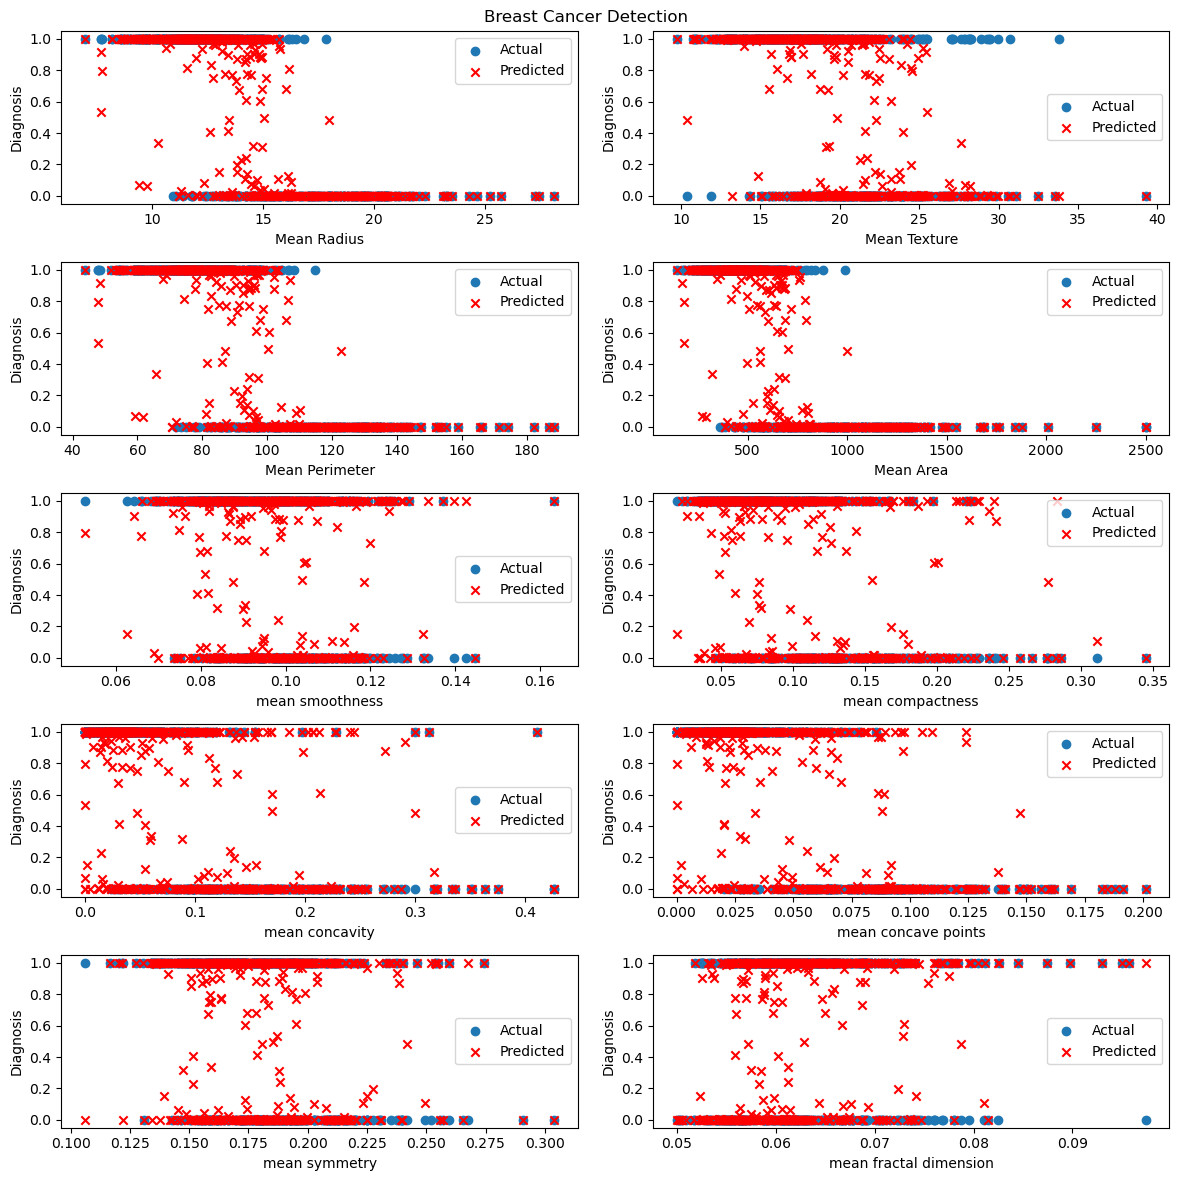

In [11]:
predicted_y = np.dot(X, w) + b
prediction = sigmoid(predicted_y)

# Create a figure with 2 subplots
fig, axs = plt.subplots(5, 2, figsize=(12, 12))
fig.suptitle('Breast Cancer Detection')
# Plot each input feature against the target variable (Diagnosis)
axs[0][0].scatter(X[:, 0], y, label='Actual')  
axs[0][0].scatter(X[:, 0], prediction, color='red', marker='x', label='Predicted')
axs[0][0].set_xlabel('Mean Radius')
axs[0][0].set_ylabel('Diagnosis')
axs[0][0].legend()

axs[0][1].scatter(X[:, 1], y,label="Actual")  
axs[0][1].scatter(X[:, 1], prediction, color='red', marker='x', label='Predicted')
axs[0][1].set_xlabel('Mean Texture')
axs[0][1].set_ylabel('Diagnosis')
axs[0][1].legend()

axs[1][0].scatter(X[:, 2], y,label="Actual")  
axs[1][0].scatter(X[:, 2], prediction, color='red', marker='x', label='Predicted')
axs[1][0].set_xlabel('Mean Perimeter')
axs[1][0].set_ylabel('Diagnosis')
axs[1][0].legend()

axs[1][1].scatter(X[:, 3], y,label="Actual") 
axs[1][1].scatter(X[:, 3], prediction, color='red', marker='x', label='Predicted')
axs[1][1].set_xlabel('Mean Area')
axs[1][1].set_ylabel('Diagnosis')
axs[1][1].legend()

axs[2][0].scatter(X[:, 4], y,label="Actual")  
axs[2][0].scatter(X[:, 4], prediction, color='red', marker='x', label='Predicted')
axs[2][0].set_xlabel('mean smoothness')
axs[2][0].set_ylabel('Diagnosis')
axs[2][0].legend()

axs[2][1].scatter(X[:, 5], y,label="Actual")  
axs[2][1].scatter(X[:, 5], prediction, color='red', marker='x', label='Predicted')
axs[2][1].set_xlabel('mean compactness')
axs[2][1].set_ylabel('Diagnosis')
axs[2][1].legend()

axs[3][0].scatter(X[:, 6], y,label="Actual") 
axs[3][0].scatter(X[:, 6], prediction, color='red', marker='x', label='Predicted')
axs[3][0].set_xlabel('mean concavity')
axs[3][0].set_ylabel('Diagnosis')
axs[3][0].legend()

axs[3][1].scatter(X[:, 7], y,label="Actual") 
axs[3][1].scatter(X[:, 7], prediction, color='red', marker='x', label='Predicted')
axs[3][1].set_xlabel('mean concave points')
axs[3][1].set_ylabel('Diagnosis')
axs[3][1].legend()

axs[4][0].scatter(X[:, 8], y,label="Actual")
axs[4][0].scatter(X[:, 8], prediction, color='red', marker='x', label='Predicted')
axs[4][0].set_xlabel('mean symmetry')
axs[4][0].set_ylabel('Diagnosis')
axs[4][0].legend()

axs[4][1].scatter(X[:, 9], y,label="Actual")
axs[4][1].scatter(X[:, 9], prediction, color='red', marker='x', label='Predicted')
axs[4][1].set_xlabel('mean fractal dimension')
axs[4][1].set_ylabel('Diagnosis')
axs[4][1].legend()

# Adjust the layout to prevent overlapping of subplots
plt.tight_layout()

# Show the plot
plt.show()


In [12]:
# Example of a sample input for testing
sample_input = [16.37, 18.82, 85.78, 639.90, 0.1212, 0.3897, 0.2045, 0.7599, 0.2514, 0.0727]

# Reshape the sample input to match the shape of X (assuming X has shape (m, 10))
sample_input = np.array(sample_input).reshape(1, -1)


# Make a prediction using the trained model
z = np.dot(sample_input, w) + b
prediction = sigmoid(z)

# Convert the prediction to a class label (0 or 1) based on a threshold (e.g., 0.5)
predicted_class = 1 if prediction >= 0.5 else 0

print("Sample Input:", sample_input)
print("Predicted Probability of Breast Cancer:", prediction)
threshold = 0.5

# Check if the predicted probability is greater than the threshold
if prediction >= threshold:
    print("The patient is predicted to have breast cancer.")
else:
    print("The patient is predicted to not have breast cancer.")


Sample Input: [[1.637e+01 1.882e+01 8.578e+01 6.399e+02 1.212e-01 3.897e-01 2.045e-01
  7.599e-01 2.514e-01 7.270e-02]]
Predicted Probability of Breast Cancer: [1.71253655e-05]
The patient is predicted to not have breast cancer.
